In [4]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
sns.set_theme(style = "whitegrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC, LinearSVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, plot_confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
import io

In [5]:
hdata = pd.read_csv(r"C:\Users\curly\OneDrive\Documents\cardio_file_from_csv.csv")

In [6]:
hdata.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [7]:
hdata.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
glucose        0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
hdata.duplicated().sum()

0

In [9]:
column_name_update = {'id': 'ID',
                      'age': 'AGE',
                      'gender': 'SEX',
                      'height': 'HEIGHT cm',
                      'weight': 'WEIGHT kg',
                      'ap_hi': 'SYS BP',
                      'ap_lo': 'DIA BP',
                      'cholesterol': 'CHOLESTEROL',
                      'glucose': 'GLUCOSE',
                      'smoke': 'SMOKER',
                      'alco': 'ALCOHOL INTAKE',
                      'active': 'EXERCISE',
                      'cardio': 'HEART DISEASE'
                     }

In [10]:
hdata = hdata.rename(columns=column_name_update)

In [11]:
hdata.AGE = hdata.AGE.apply(lambda x: x / 365)

In [12]:
 hdata['BMI'] = hdata['WEIGHT kg'] / (hdata['HEIGHT cm']/100)**2

In [13]:
hdata.round().astype('int')

,ID,AGE,SEX,HEIGHT cm,WEIGHT kg,SYS BP,DIA BP,CHOLESTEROL,GLUCOSE,SMOKER,ALCOHOL INTAKE,EXERCISE,HEART DISEASE,BMI
0,988,62,1,155,69,130,80,2,2,0,0,1,0,29
1,989,40,1,163,71,110,70,1,1,0,0,1,1,27
2,990,60,1,165,70,120,80,1,1,0,0,1,0,26
3,991,40,2,165,85,120,80,1,1,1,1,1,0,31
4,992,64,1,155,62,120,80,1,1,0,0,1,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,53,2,168,76,120,80,1,1,1,0,1,0,27
69297,99995,62,1,158,126,140,90,2,2,0,0,1,1,50
69298,99996,52,2,183,105,180,90,3,1,0,1,0,1,31
69299,99998,61,1,163,72,135,80,1,2,0,0,0,1,27


In [14]:
hdata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,69301.0,50471.480397,28563.100347,988.000000,25745.000000,50494.000000,75150.000000,99999.000000
AGE,69301.0,53.339140,6.759621,29.583562,48.394521,53.983562,58.427397,64.967123
SEX,69301.0,1.349519,0.476821,1.000000,1.000000,1.000000,2.000000,2.000000
HEIGHT cm,69301.0,164.362217,8.205337,55.000000,159.000000,165.000000,170.000000,250.000000
WEIGHT kg,69301.0,74.203027,14.383469,10.000000,65.000000,72.000000,82.000000,200.000000
SYS BP,69301.0,128.829584,154.775805,-150.000000,120.000000,120.000000,140.000000,16020.000000
DIA BP,69301.0,96.650092,189.096240,-70.000000,80.000000,80.000000,90.000000,11000.000000
CHOLESTEROL,69301.0,1.366806,0.680270,1.000000,1.000000,1.000000,2.000000,3.000000
GLUCOSE,69301.0,1.226447,0.572246,1.000000,1.000000,1.000000,1.000000,3.000000
SMOKER,69301.0,0.088051,0.283371,0.000000,0.000000,0.000000,0.000000,1.000000


In [15]:
cardio_df = hdata.copy()

cardio_df.loc[(cardio_df["AGE"] < 40), 'AGE_RANGE'] = 30
cardio_df.loc[(cardio_df["AGE"] >= 40) & (cardio_df['AGE'] <50), 'AGE_RANGE'] =40
cardio_df.loc[(cardio_df["AGE"] >= 50) & (cardio_df['AGE'] <60), 'AGE_RANGE'] =50
cardio_df.loc[(cardio_df["AGE"] >= 60) & (cardio_df['AGE'] <70), 'AGE_RANGE'] =60

Text(0, 0.5, 'Number of Patients')

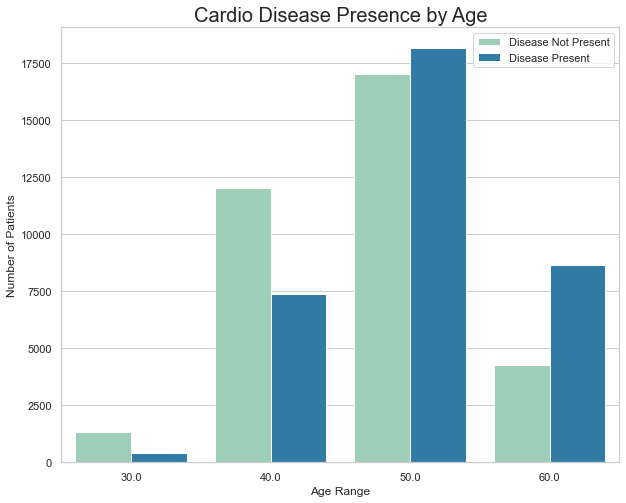

In [16]:
plt.figure(figsize = (10, 8))
sns.countplot(x= 'AGE_RANGE', hue= 'HEART DISEASE', data= cardio_df, palette = "YlGnBu")
plt.title('Cardio Disease Presence by Age', fontsize=20)
plt.xlabel('Age Range')
plt.legend( ['Disease Not Present', 'Disease Present'])
plt.ylabel('Number of Patients')

Text(0, 0.5, 'Number of Patients')

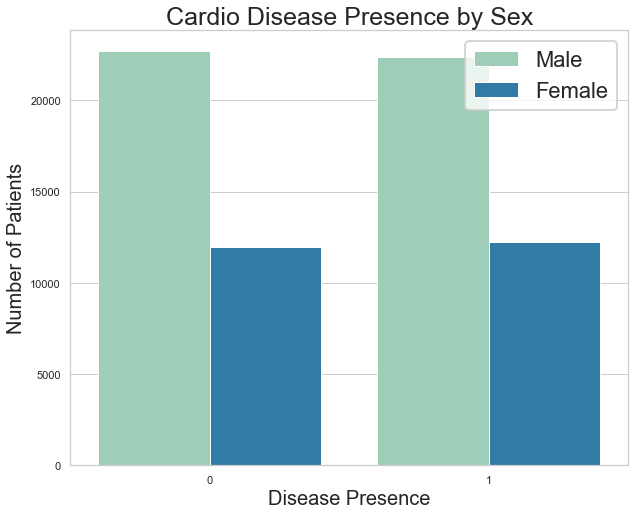

In [17]:
legend_name = ['Male', 'Female']
plt.figure(figsize = (10, 8))
sns.countplot(x='HEART DISEASE', hue='SEX', data= cardio_df, palette = "YlGnBu")
plt.title('Cardio Disease Presence by Sex', fontsize=25)
plt.xlabel('Disease Presence', fontsize=20)
sns.set_context("poster")

plt.legend(legend_name)
plt.ylabel('Number of Patients', fontsize=20)

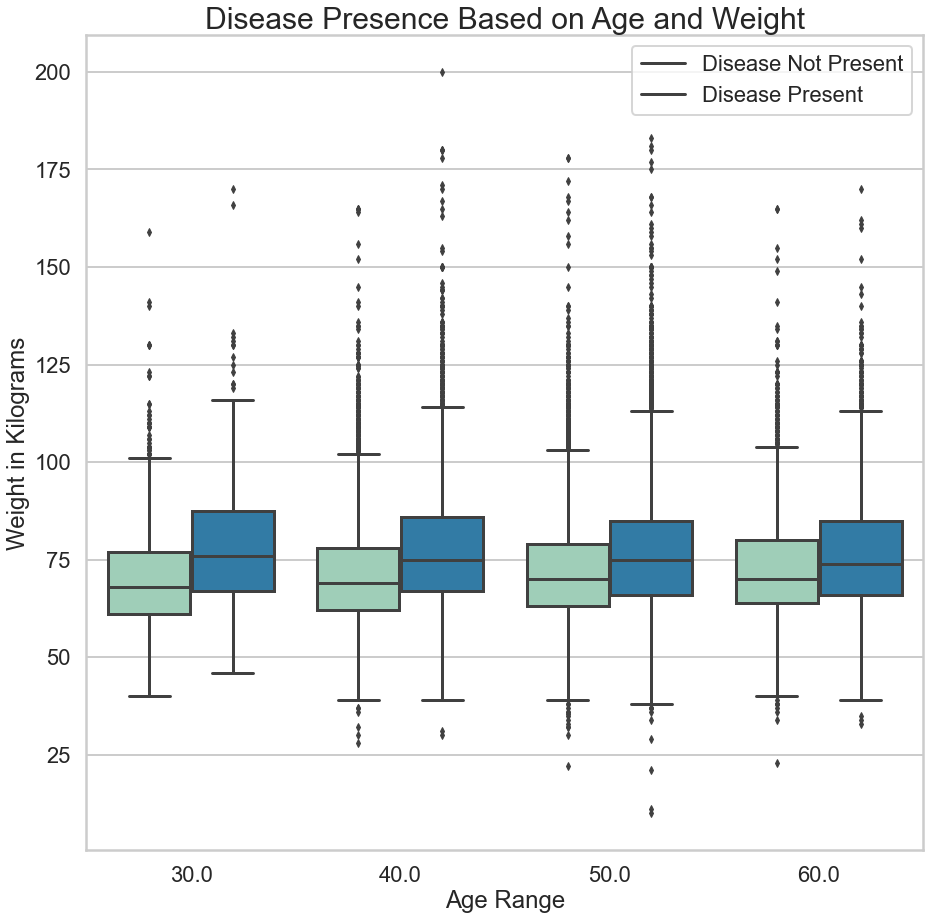

In [18]:
plt.figure(figsize=(15, 15))
sns.set_context("poster")
sns.boxplot(x='AGE_RANGE', y="WEIGHT kg", hue='HEART DISEASE', data=cardio_df, palette="YlGnBu")
plt.title('Disease Presence Based on Age and Weight', fontsize=30)
plt.xlabel('Age Range')
plt.ylabel('Weight in Kilograms')
disease_label = ['Disease Not Present', 'Disease Present']
plt.legend(disease_label)

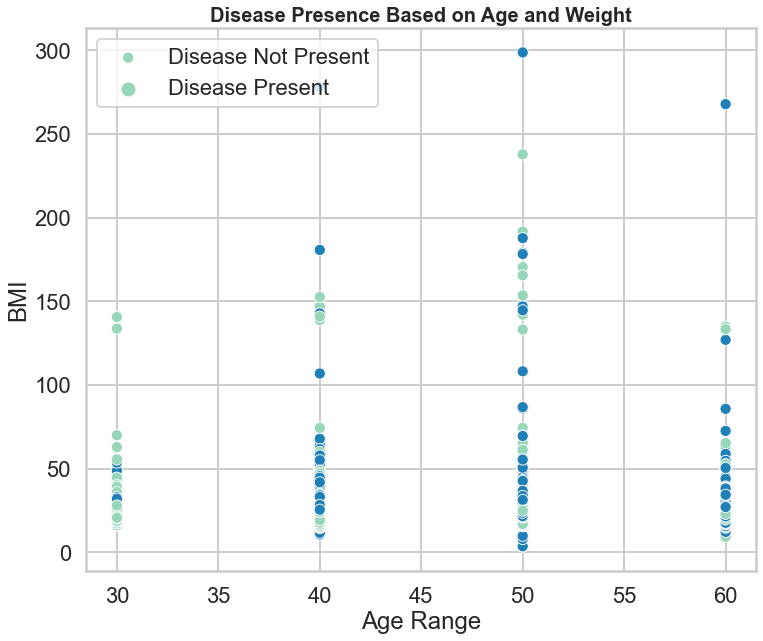

In [19]:
plt.figure(figsize=(12, 10))
sns.set_context("poster")
sns.scatterplot(x='AGE_RANGE', y="BMI", hue='HEART DISEASE', data=cardio_df, palette="YlGnBu", s=125, edgecolors='k')
plt.title('Disease Presence Based on Age and Weight', fontweight='bold', fontsize=20)
plt.xlabel('Age Range')
plt.ylabel('BMI')
plt.legend(disease_label)

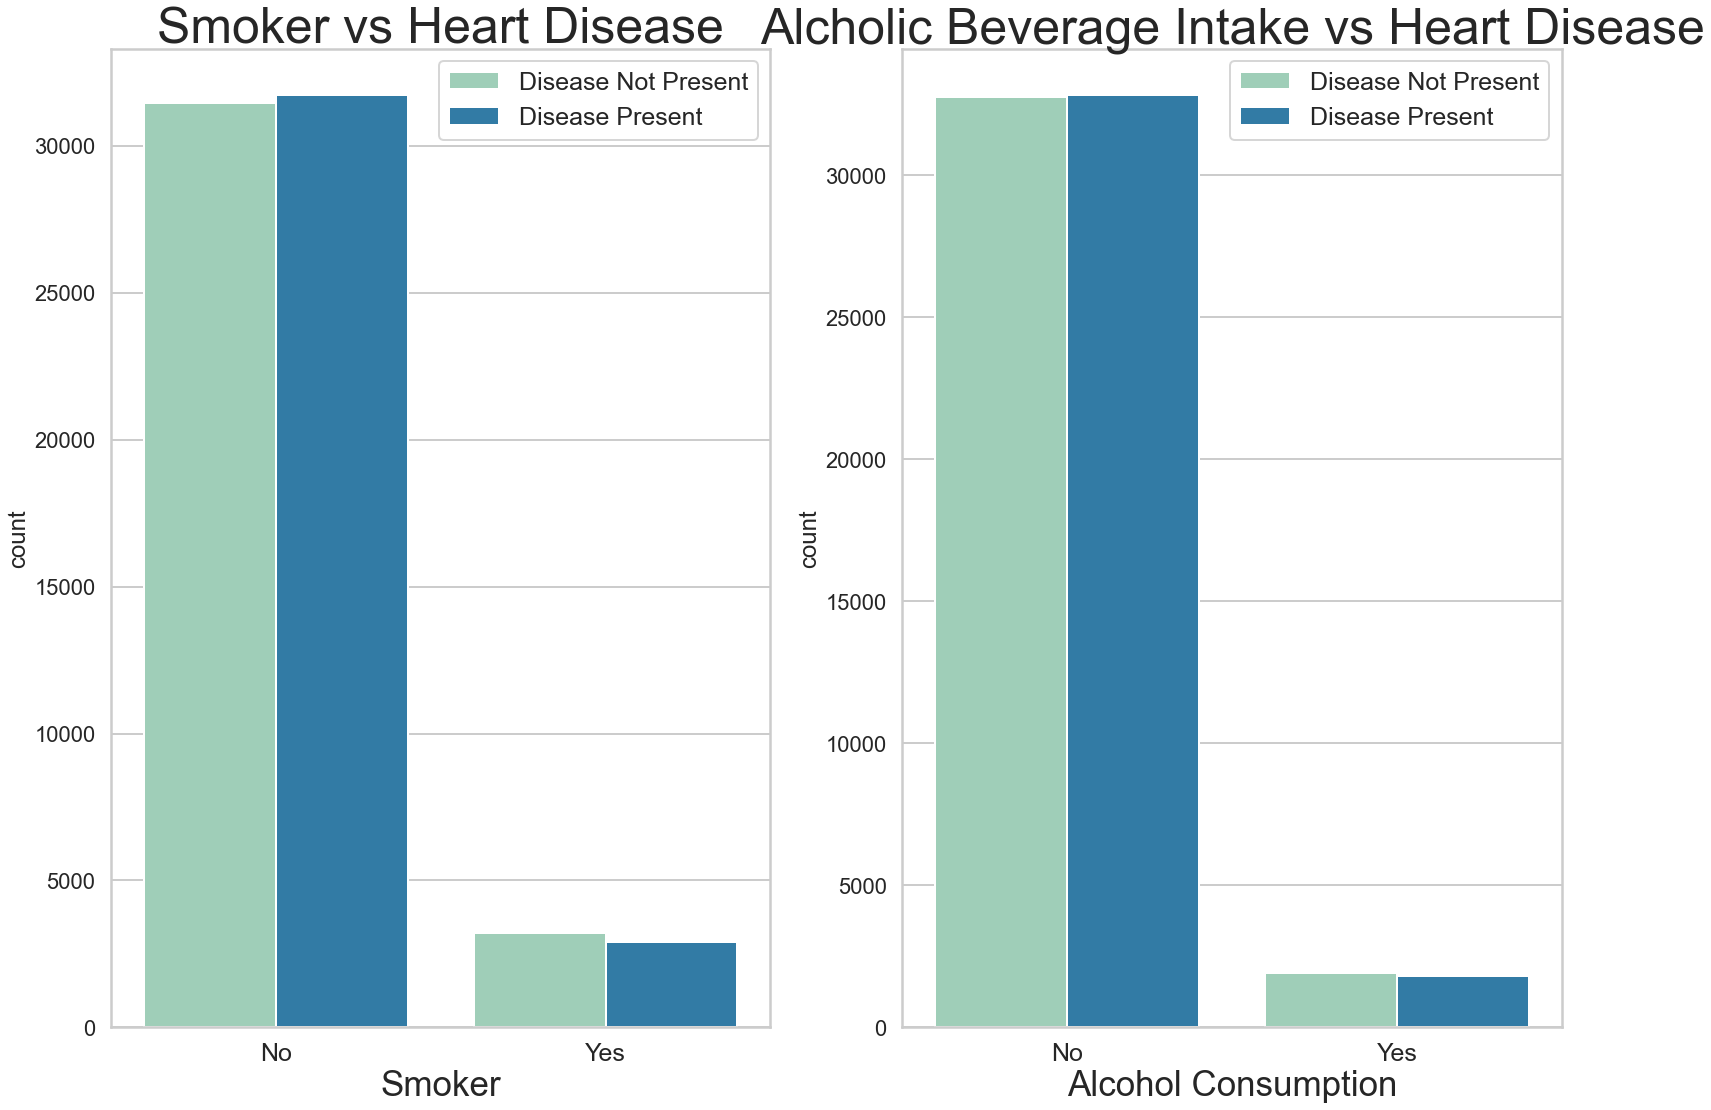

In [36]:
fig, ax =plt.subplots(1,2,figsize=(26,18))
sns.set_context("poster")
sns.countplot(x='SMOKER', hue='HEART DISEASE', data=cardio_df, palette="YlGnBu",ax=ax[0])
sns.countplot(x='ALCOHOL INTAKE',hue='HEART DISEASE',data=cardio_df, palette="YlGnBu",ax=ax[1])
ax[0].set_title("Smoker vs Heart Disease", fontsize=50)
ax[1].set_title("Alcholic Beverage Intake vs Heart Disease", fontsize=50)
ax[0].set_xlabel("Smoker", fontsize=35)
ax[1].set_xlabel("Alcohol Consumption", fontsize=35)
ax[0].set_xticklabels(["No","Yes"], fontsize = 25)
ax[1].set_xticklabels(["No","Yes"], fontsize=25)
ax[0].legend(["Disease Not Present", "Disease Present"],fontsize=25,loc="upper right")
ax[1].legend(["Disease Not Present","Disease Present"], fontsize=25,loc="upper right")
plt.show()

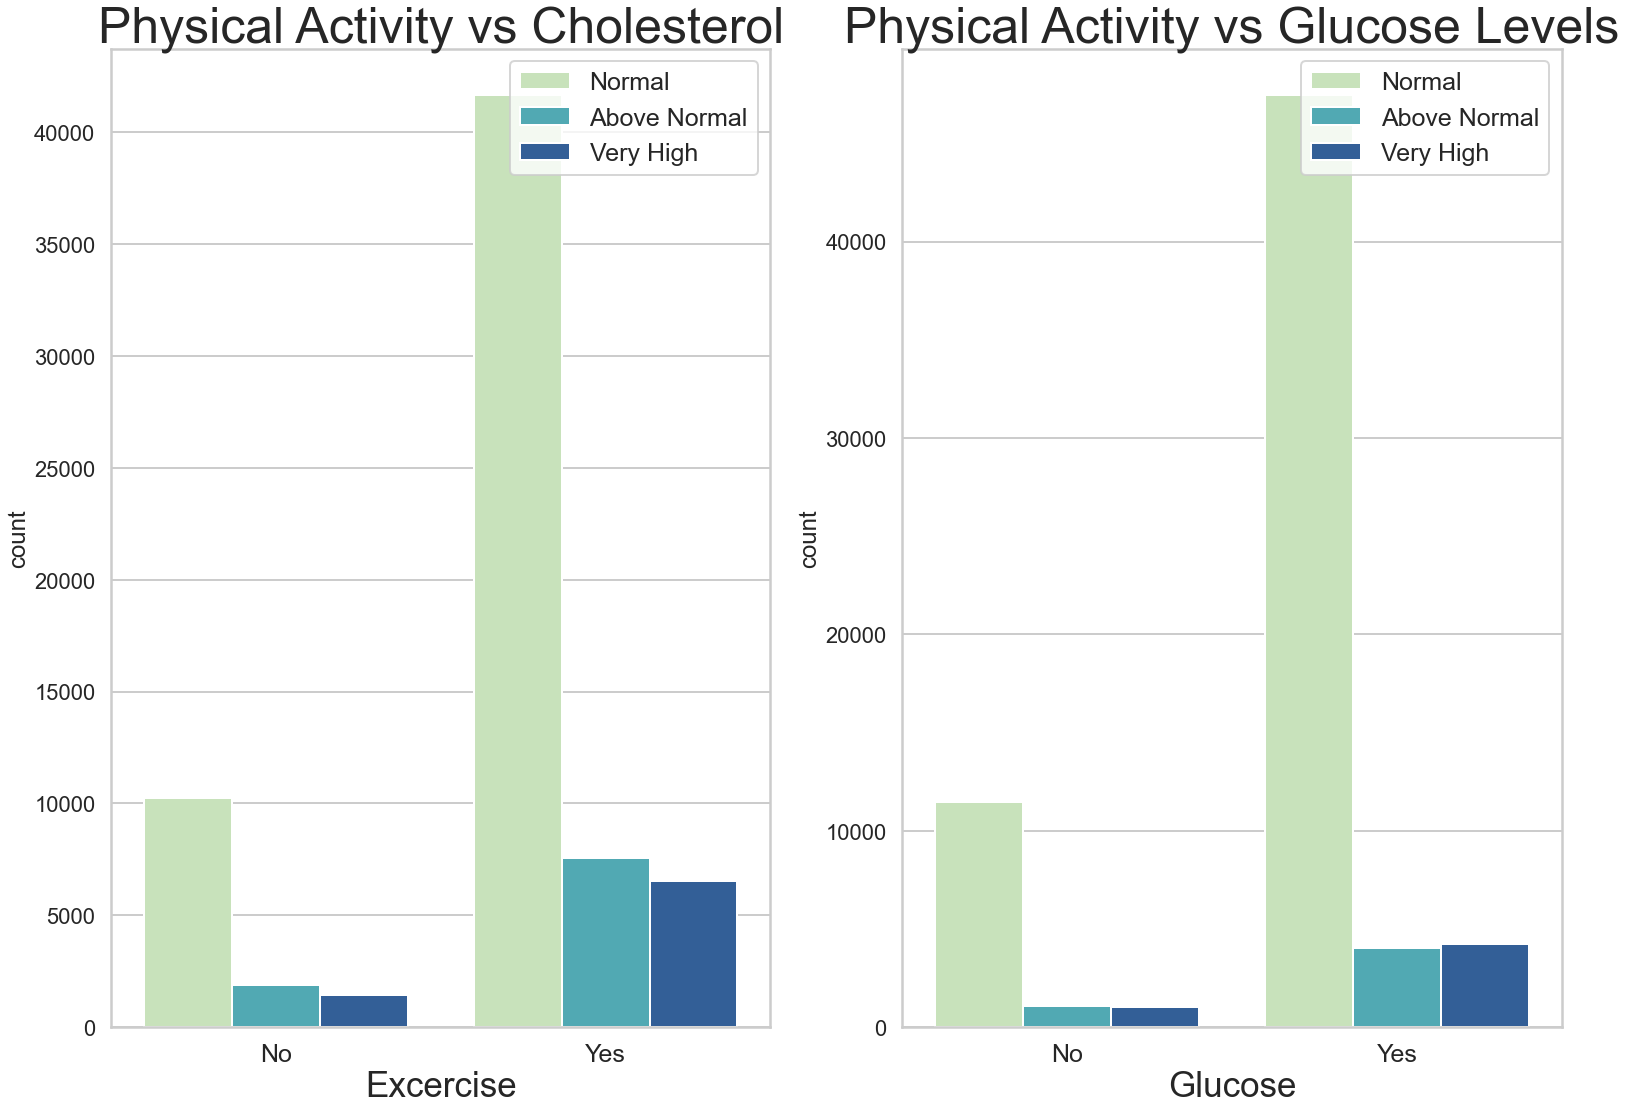

In [39]:
fig, ax =plt.subplots(1,2,figsize=(26,18))
sns.set_context("poster")
sns.countplot(x='EXERCISE', hue='CHOLESTEROL', data=cardio_df, palette="YlGnBu",ax=ax[0])
sns.countplot(x='EXERCISE',hue='GLUCOSE',data=cardio_df, palette="YlGnBu",ax=ax[1])
ax[0].set_title("Physical Activity vs Cholesterol", fontsize=50)
ax[1].set_title("Physical Activity vs Glucose Levels", fontsize=50)
ax[0].set_xlabel("Excercise", fontsize=35)
ax[1].set_xlabel("Glucose", fontsize=35)
ax[0].set_xticklabels(["No","Yes"], fontsize = 25)
ax[1].set_xticklabels(["No","Yes"], fontsize=25)
ax[0].legend(["Normal", "Above Normal", "Very High"],fontsize=25,loc="upper right")
ax[1].legend(["Normal","Above Normal", "Very High"], fontsize=25,loc="upper right")
plt.show()

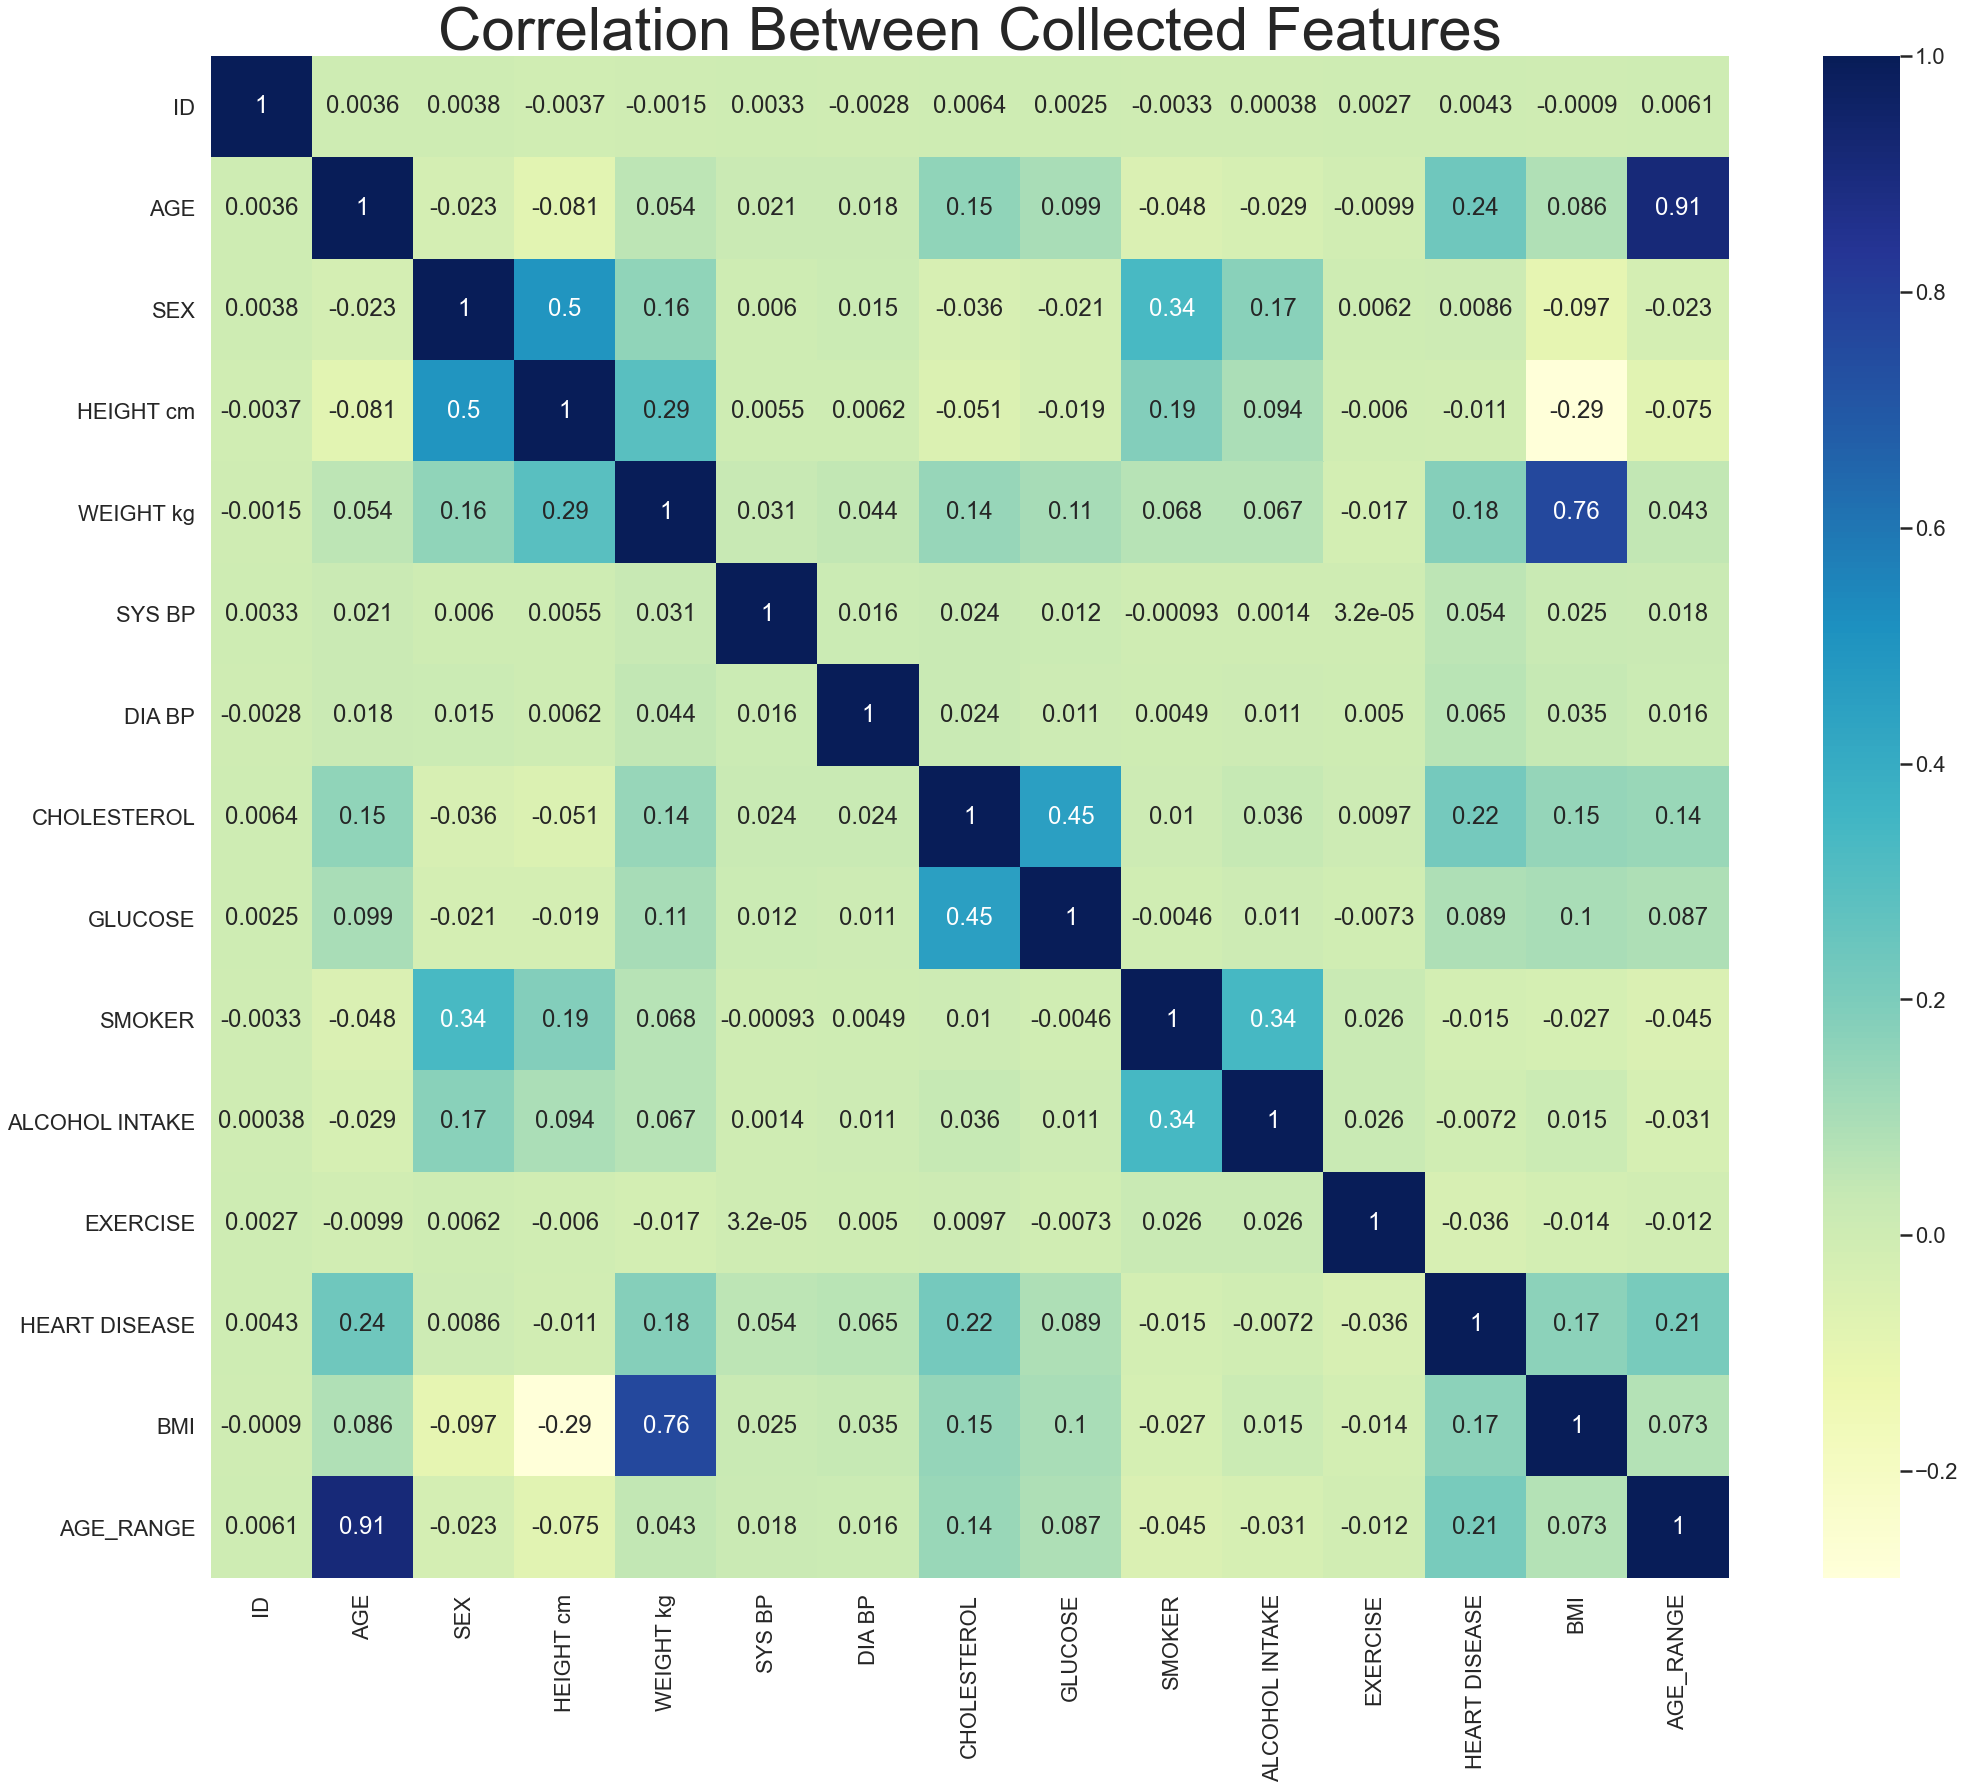

In [19]:
plt.figure(figsize= (34,28))
cardio_df_plot = sns.heatmap(cardio_df.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Between Collected Features', fontsize=60)
sns.set_context("poster")
plt.show()

In [20]:
X = cardio_df.drop('HEART DISEASE', axis=1)
y = cardio_df['HEART DISEASE']
print("Shape of X is :", X.shape, "Shape of y is :", y.shape)

Shape of X is : (69301, 14) Shape of y is : (69301,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
y_test.shape

(17326,)

In [43]:
supportvm = SVC(random_state=42)
ran = RandomForestClassifier()
logis = LogisticRegression()

In [44]:
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
classifier_types = {
    "svm": supportvm,
    "log": logis,
    "ran": ran
    
}

In [47]:
results = pd.DataFrame(columns= ['Train_Acc', 'Test_Acc', 'F1_Score', 
                                'False_Neg', 'True_Pos'])

for key, value in classifier_types.items():
    value.fit(X_train, y_train)
    train_predict = value.predict(X_train)
    y_predict = value.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_predict) * 100
    test_acc = accuracy_score(y_test, y_predict) * 100
    F1 = f1_score(y_test, y_predict)
    c_matrix = confusion_matrix(y_test, y_predict)
    False_neg = c_matrix[1][0]
    True_pos = c_matrix[1][1]
    
    results.loc[key] = [round(train_acc, 2), round(test_acc, 2), 
                        round(F1, 2), round(False_neg, 0), round(True_pos, 0)]
    
results.sort_values(by= ['F1_Score', 'False_Neg'], ascending= False)

,Train_Acc,Test_Acc,F1_Score,False_Neg,True_Pos
svm,73.42,72.28,0.72,2626.0,6046.0
log,72.25,72.09,0.71,2786.0,5886.0
ran,100.00,72.07,0.71,2610.0,6062.0


In [48]:
from sklearn.metrics import plot_roc_curve

<ipython-input-80-b71637fe795c>:10: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


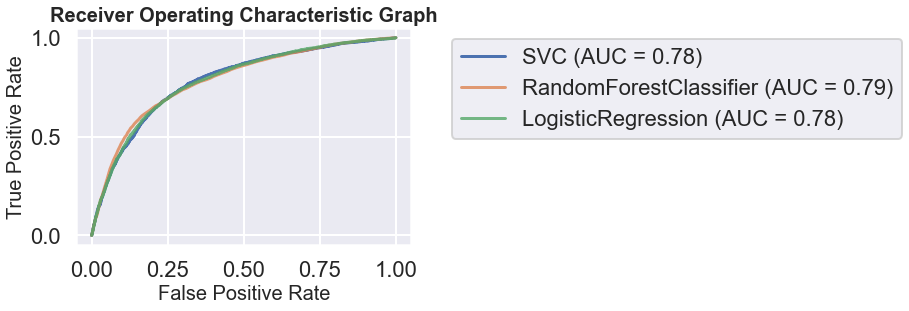

In [80]:
svm_disp = plot_roc_curve(supportvm, X_test, y_test)
ax = plt.gca()
ran_disp=plot_roc_curve(ran, X_test, y_test, ax=ax, alpha=0.8)
log_plot=plot_roc_curve(logis, X_test, y_test, ax=ax, alpha=0.8)
sns.set_context("poster")
leg = plt.legend( loc = 'upper right')

plt.draw() # Draw the figure so you can find the positon of the legend. 

bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 1.5
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
plt.title('Receiver Operating Characteristic Graph', fontweight='bold', fontsize=20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)

# Update the plot
plt.show()


In [68]:
svm = SVC(class_weight = {1: 1.5}, random_state = 42)

In [69]:
svm.fit(X_train, y_train)

SVC(class_weight={1: 1.5}, random_state=42)

In [70]:
print(c_matrix)

[[6425 2229]
 [2610 6062]]


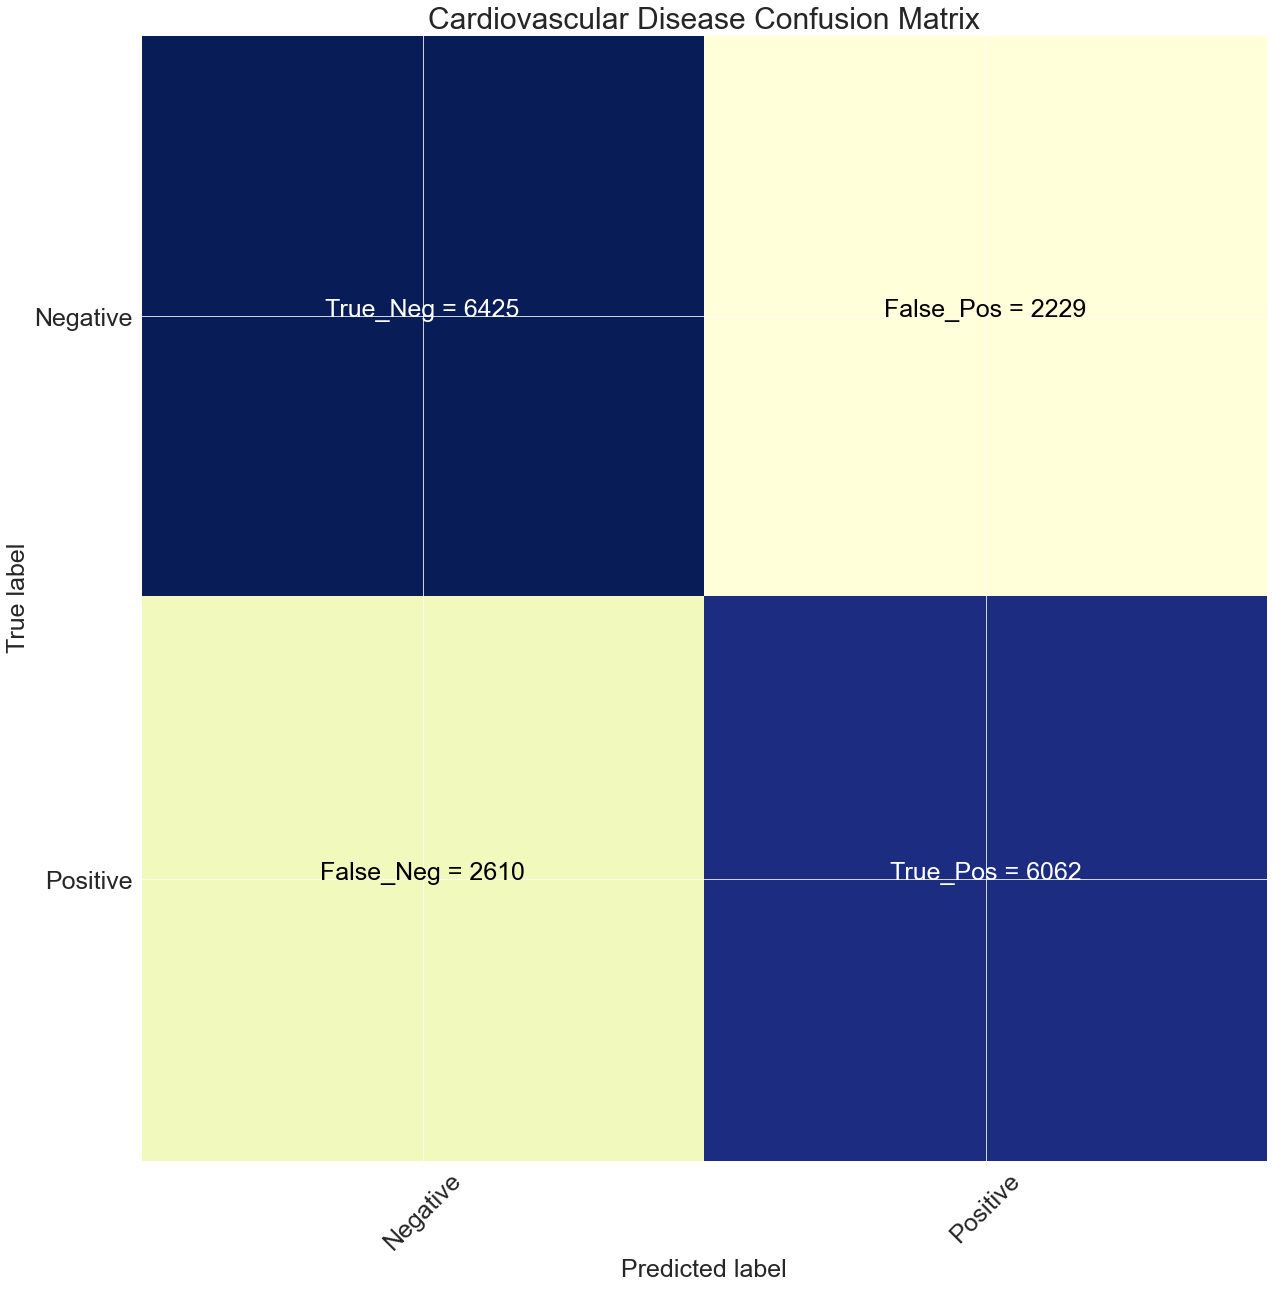

In [93]:
plt.figure(figsize= (20,18))

svm_2 = SVC(kernel='rbf', random_state=42)
svm_2.fit(X_train, y_train)

plt.clf()
plt.imshow(c_matrix, interpolation='nearest', cmap=plt.cm.YlGnBu)
classNames = ['Negative','Positive']
plt.title('Cardiovascular Disease Confusion Matrix', fontsize= 30)
sns.set("paper")
plt.ylabel('True label', fontsize=25)
plt.xlabel('Predicted label', fontsize=25)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, fontsize=25, rotation=45)
plt.yticks(tick_marks, classNames, fontsize =25)
s = [['True_Neg','False_Pos'], ['False_Neg', 'True_Pos']]
threshold = c_matrix.max() /2.
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(c_matrix[i][j]), horizontalalignment="center",
                 color="white" if c_matrix[i, j] > threshold else "black" ,fontsize=25)
plt.tight_layout()
plt.show()

In [91]:
svm_cardio_pred = svm_2.predict(X_test)

In [92]:
print(classification_report(y_test, svm_cardio_pred))
print('\n')

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      8654
           1       0.74      0.70      0.72      8672

    accuracy                           0.72     17326
   macro avg       0.72      0.72      0.72     17326
weighted avg       0.72      0.72      0.72     17326



